In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

In [2]:
cumulative_vaccinations = [
    1959151,
    2080280,
    2254556,
    2494371,
    2769164,
    3090058,
    3365492,
    3520056,
    3687206,
    3985579,
    4303730,
    4661293,
    5085771,
    5727693,
    5962544,
    6221850,
    6473752,
    6816945,
    7253305,
    7792996,
    8082355,
    ]

daily_inoculations = [100000]

for i, x in enumerate(cumulative_vaccinations):
    if len(cumulative_vaccinations) > i+1:
        daily_inoculations.append(cumulative_vaccinations[i+1] - x)

dataframe = pd.DataFrame({'date': pd.date_range(start='1/12/2021', end='2/1/2021'), 'daily': daily_inoculations, 'cumulative': cumulative_vaccinations})
dataframe.set_index('date', inplace=True)

In [3]:
from datetime import datetime, timedelta

reg = LinearRegression()

x = np.array([x.timetuple().tm_yday for x in dataframe.index]).reshape(-1, 1)
y = dataframe['daily']

reg.fit(x, y)

LinearRegression()

In [4]:
import math
start = 11 + len(dataframe)
prediction_range = range(start, start + 35)
prediction_range_array = np.array(prediction_range).reshape(-1, 1)
projection = reg.predict(prediction_range_array)
projection = [x - (math.log(x) * 600 * i) for i, x in enumerate(projection, start=1)]
print(projection)

[417258.88397447387, 422316.31301071827, 427339.5029781882, 432329.8923790963, 437288.81494463107, 442217.5100910127, 447117.1320738054, 451988.7580325194, 456833.3950850497, 461651.98660517175, 466445.4177948625, 471214.52064564044, 475960.0783686434, 480682.82936119754, 485383.47076767194, 490062.6616841166, 494721.02604920964, 499359.15525819175, 503977.61053150275, 508576.9250656565, 513157.6059903006, 517720.1361523799, 522264.9757456947, 526792.5638019196, 531303.3195572018, 535797.6437068048, 540275.9195588009, 544738.5140965774, 549185.7789588114, 553618.0513446264, 558035.6548507973, 562438.9002471493, 566828.0861956363, 571203.4999180357, 575565.4178166745]


In [5]:

prediction_dates = [(datetime(2021, 1, 1) + timedelta(x)) for x in prediction_range]
result_df = pd.DataFrame({'date': prediction_dates, 'daily': projection})
result_df.set_index('date', inplace=True)

In [6]:
last_known = dataframe['cumulative'][-1]
# print(last_known)
projection_cumulative = []
for x in projection:
    projection_cumulative.append(last_known + x)
    last_known = last_known + x
result_df['cumulative'] = projection_cumulative
print(result_df)

                    daily    cumulative
date                                   
2021-02-02  417258.883974  8.499614e+06
2021-02-03  422316.313011  8.921930e+06
2021-02-04  427339.502978  9.349270e+06
2021-02-05  432329.892379  9.781600e+06
2021-02-06  437288.814945  1.021889e+07
2021-02-07  442217.510091  1.066111e+07
2021-02-08  447117.132074  1.110822e+07
2021-02-09  451988.758033  1.156021e+07
2021-02-10  456833.395085  1.201705e+07
2021-02-11  461651.986605  1.247870e+07
2021-02-12  466445.417795  1.294514e+07
2021-02-13  471214.520646  1.341636e+07
2021-02-14  475960.078369  1.389232e+07
2021-02-15  480682.829361  1.437300e+07
2021-02-16  485383.470768  1.485838e+07
2021-02-17  490062.661684  1.534845e+07
2021-02-18  494721.026049  1.584317e+07
2021-02-19  499359.155258  1.634253e+07
2021-02-20  503977.610532  1.684650e+07
2021-02-21  508576.925066  1.735508e+07
2021-02-22  513157.605990  1.786824e+07
2021-02-23  517720.136152  1.838596e+07
2021-02-24  522264.975746  1.890822e+07


In [7]:
complete = pd.concat([dataframe, result_df])
print(complete)


                    daily    cumulative
date                                   
2021-01-12  100000.000000  1.959151e+06
2021-01-13  121129.000000  2.080280e+06
2021-01-14  174276.000000  2.254556e+06
2021-01-15  239815.000000  2.494371e+06
2021-01-16  274793.000000  2.769164e+06
2021-01-17  320894.000000  3.090058e+06
2021-01-18  275434.000000  3.365492e+06
2021-01-19  154564.000000  3.520056e+06
2021-01-20  167150.000000  3.687206e+06
2021-01-21  298373.000000  3.985579e+06
2021-01-22  318151.000000  4.303730e+06
2021-01-23  357563.000000  4.661293e+06
2021-01-24  424478.000000  5.085771e+06
2021-01-25  641922.000000  5.727693e+06
2021-01-26  234851.000000  5.962544e+06
2021-01-27  259306.000000  6.221850e+06
2021-01-28  251902.000000  6.473752e+06
2021-01-29  343193.000000  6.816945e+06
2021-01-30  436360.000000  7.253305e+06
2021-01-31  539691.000000  7.792996e+06
2021-02-01  289359.000000  8.082355e+06
2021-02-02  417258.883974  8.499614e+06
2021-02-03  422316.313011  8.921930e+06


<Figure size 432x288 with 0 Axes>

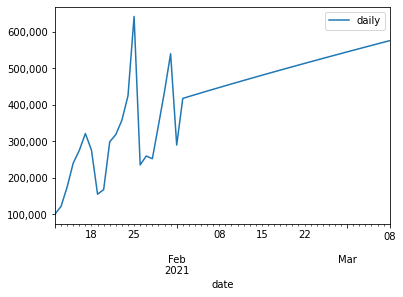

<Figure size 432x288 with 0 Axes>

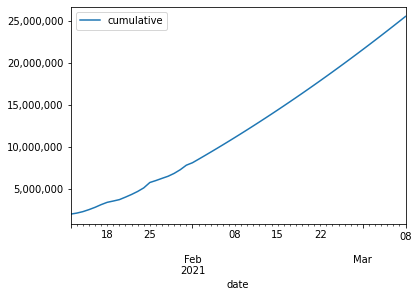

In [8]:
fig = plt.figure()
ax = complete.drop('cumulative', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

fig = plt.figure()
ax = complete.drop('daily', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

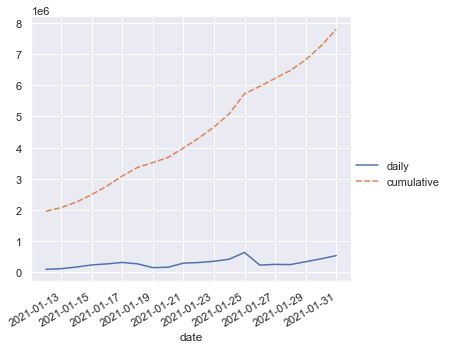

In [27]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.relplot(kind="line", data=dataframe)
g.fig.autofmt_xdate()
